In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#get all of the simulation rate parameters (rates in per second)
mdrate=0.0042 
iarate=0.00126
airate=0.02772
amrate=1.008
frames=100000000
frametime=0.01

In [3]:
#now convert everything to frame time units (unit is now 1/frame)
iarate=iarate*frametime
airate=airate*frametime
amrate=amrate*frametime
mdrate=mdrate*frametime
ontime=[1.0/iarate,1.0/airate]
print('on times:')
print(ontime)
print('prod tau:')
print(1.0/amrate)

on times:
[79365.07936507936, 3607.5036075036073]
prod tau:
99.2063492063492


In [4]:
state=False
traj=np.zeros(frames,dtype=float)
states=np.zeros(frames,dtype=float)
for i in range(1,frames):
    if(np.random.exponential(ontime[state])<1.0):
        state=not state
    dm=-mdrate*traj[i-1]
    if(state):
        states[i]=1.0
        dm=dm+amrate
    traj[i]=traj[i-1]+dm

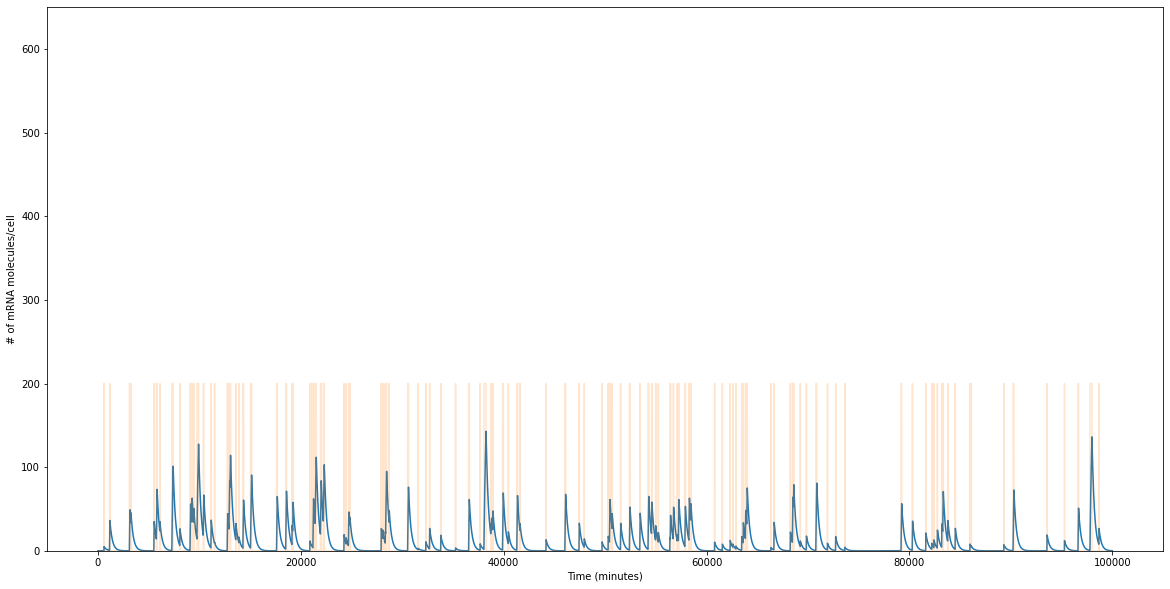

In [5]:
xvals=np.arange(frames)*frametime
start=0
stop=10000000
plt.figure(figsize=(20,10))
plt.plot(xvals[start:stop],traj[start:stop])
plt.plot(xvals[start:stop],states[start:stop]*200,alpha=0.2)
plt.xlabel('Time (minutes)')
plt.ylabel('# of mRNA molecules/cell')
plt.ylim(0,650)
plt.savefig('mut-timetrace-3.pdf', format='pdf')
plt.show()

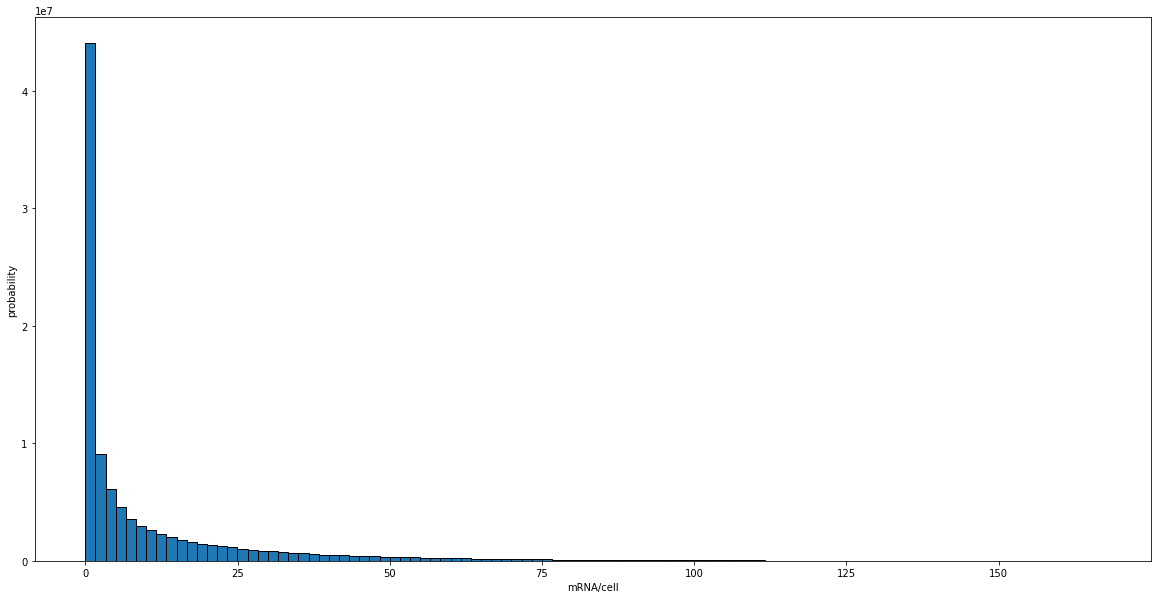

In [6]:
plt.figure(figsize=(20,10))
#plt.hist(traj,bins=1000, histtype='bar')
plt.hist(traj,bins=100, histtype='bar', edgecolor='black')
plt.ylabel('probability')
plt.xlabel('mRNA/cell')
plt.savefig('mut-distribution-3-outlined-100bins.pdf', format='pdf')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=traj)
plt.ylabel('probability')
plt.xlabel('mRNA/cell')
plt.savefig('Mut-distribution.pdf', format='pdf')

In [10]:
import pandas as pd

In [11]:
data = pd.DataFrame()

In [12]:
data['xvals'] = xvals

In [13]:
data['traj'] = traj

In [14]:
data['states'] = states